In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

In [2]:
df1=pd.read_csv("D:/train_set.csv")
df1.shape
new_df=df1.sample(20000)
new_df.shape

(20000, 6)

In [3]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [4]:
new_df.dropna(inplace=True)
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

count:-
0    12591
1     7409
Name: is_duplicate, dtype: int64

percentage:-
0    62.955
1    37.045
Name: is_duplicate, dtype: float64


<AxesSubplot:>

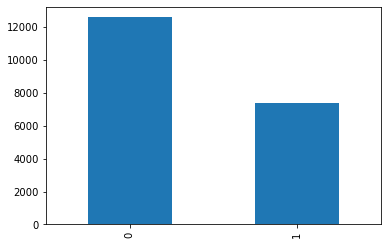

In [5]:
#distribution of duplicate and non duplicate questions
print('count:-')
print(new_df['is_duplicate'].value_counts())
print()
print("percentage:-")
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [6]:
#repeated questions

qid=pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('number of unique questions is :-',np.unique(qid).shape[0])
x=qid.value_counts()>1
print('number of questions getting repeated :-',x[x].shape[0])

number of unique questions is :- 37769
number of questions getting repeated :- 1776


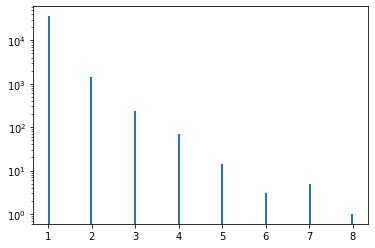

In [7]:
#repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

# Text Preprocessing

In [8]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters
    q = q.replace('%', ' percentage ')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at the rate ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string
    q = q.replace(',000,000,000 ', 'billion ')
    q = q.replace(',000,000 ', 'million ')
    q = q.replace(',000 ', 'thousand ')
    q = re.sub(r'([0-9]+)000000000', r'\1billion', q)
    q = re.sub(r'([0-9]+)000000', r'\1million', q)
    q = re.sub(r'([0-9]+)000', r'\1thousand', q)
    
    # Decontracting words
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }
    
    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    patt=re.compile('<.*?>')
    q=patt.sub(r'',q)
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()
    
    #stemming:- process of reducing inflection in words to their root form     
    from nltk.stem.porter import PorterStemmer
    ps=PorterStemmer()
    q= " ".join([ps.stem(word) for word in q.split()])

    return q

In [10]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

# Added features here

In [11]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()
new_df.sample(3)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
379885,379885,511445,124444,how do i convinc my parent to let me get snapchat,how can i convinc my parent to let me get a pierc,0,49,49
128272,128272,173140,123536,how should i improv my english vocabulari to c...,what are some good way to improv english vocab...,1,62,51
43556,43556,78329,78330,what should i do if i feel nervou and shi,all these news ppl r talk about how ice is our...,0,41,117


In [12]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
96599,96599,160876,160877,what are the best song by parkway drive,what are some song peopl have never heard of,0,39,44,8,9
376528,376528,127233,164327,whi do we have middl name,whi do peopl have middl name,1,25,28,6,6
21439,21439,40367,40368,how can i start creat or develop a websit,how do i start my own websit,1,41,28,9,7
352609,352609,358245,481533,how do i delet edit in my quora account,what is the babi go to do if dnc stole it job,0,39,45,9,12
133171,133171,213079,213080,whi is import to studi china s histori,what is the differ between physic world and sp...,0,38,57,8,10


In [13]:
def common_words(row):
    w1 = set(row['question1'].split(" "))
    w2 = set(row['question2'].split(" "))   
    return len(w1 & w2)

new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
96599,96599,160876,160877,what are the best song by parkway drive,what are some song peopl have never heard of,0,39,44,8,9,3
376528,376528,127233,164327,whi do we have middl name,whi do peopl have middl name,1,25,28,6,6,5
21439,21439,40367,40368,how can i start creat or develop a websit,how do i start my own websit,1,41,28,9,7,4
352609,352609,358245,481533,how do i delet edit in my quora account,what is the babi go to do if dnc stole it job,0,39,45,9,12,1
133171,133171,213079,213080,whi is import to studi china s histori,what is the differ between physic world and sp...,0,38,57,8,10,1


In [14]:
def total_words(row):
    w1 = set(row['question1'].split(" "))
    w2 = set(row['question2'].split(" "))    
    return (len(w1) + len(w2))
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
96599,96599,160876,160877,what are the best song by parkway drive,what are some song peopl have never heard of,0,39,44,8,9,3,17
376528,376528,127233,164327,whi do we have middl name,whi do peopl have middl name,1,25,28,6,6,5,12
21439,21439,40367,40368,how can i start creat or develop a websit,how do i start my own websit,1,41,28,9,7,4,16
352609,352609,358245,481533,how do i delet edit in my quora account,what is the babi go to do if dnc stole it job,0,39,45,9,12,1,21
133171,133171,213079,213080,whi is import to studi china s histori,what is the differ between physic world and sp...,0,38,57,8,10,1,17


In [15]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
96599,96599,160876,160877,what are the best song by parkway drive,what are some song peopl have never heard of,0,39,44,8,9,3,17,0.18
376528,376528,127233,164327,whi do we have middl name,whi do peopl have middl name,1,25,28,6,6,5,12,0.42
21439,21439,40367,40368,how can i start creat or develop a websit,how do i start my own websit,1,41,28,9,7,4,16,0.25
352609,352609,358245,481533,how do i delet edit in my quora account,what is the babi go to do if dnc stole it job,0,39,45,9,12,1,21,0.05
133171,133171,213079,213080,whi is import to studi china s histori,what is the differ between physic world and sp...,0,38,57,8,10,1,17,0.06


# Advanced Features

# # Token Features

In [16]:
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
   
# to prevent denominator from being zero
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
     # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

# Token Features
1 cwc_min: This is the ratio of the number of common words to the length of the smaller question

2 cwc_max: This is the ratio of the number of common words to the length of the larger question

3 csc_min: This is the ratio of the number of common stop words to the smaller stop word count among the two questions

4 csc_max: This is the ratio of the number of common stop words to the larger stop word count among the two questions

5 ctc_min: This is the ratio of the number of common tokens to the smaller token count among the two questions

6 ctc_max: This is the ratio of the number of common tokens to the larger token count among the two questions

7 last_word_eq: 1 if the last word in the two questions is same, 0 otherwise

8 first_word_eq: 1 if the first word in the two questions is same, 0 otherwise

In [17]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [18]:
new_df.sample(3)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
46853,46853,83742,83743,how do i transfer whatsapp messag from to io a...,how do i transfer whatsapp messag from iphon t...,1,52,55,10,10,...,20,0.45,0.799984,0.799984,0.999980,0.999980,0.899991,0.899991,1.0,1.0
171310,171310,264715,264716,what is a project s organ identifi in xcode,do i need an appl devic in order to archiv xco...,0,43,56,9,12,...,21,0.14,0.499988,0.285710,0.199996,0.199996,0.333330,0.249998,0.0,0.0
173210,173210,1707,168550,what doe it mean if a dog vomit white foam,what cau a dog to throw up white liquid,1,42,39,10,9,...,19,0.21,0.399992,0.333328,0.499988,0.499988,0.444440,0.399996,0.0,1.0


In [19]:
#!pip install distance
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*2
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    '''length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)'''
    
    return length_features

In [20]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))

# Length Based Features

mean_len: Mean of the length of the two questions (number of words)
    
abs_len_diff: Absolute difference between the length of the two questions (number of words)
    
longest_substr_ratio: Ratio of the length of the longest substring among the two questions to the length of the smaller question

In [21]:
new_df.sample(3)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len
243473,243473,355915,355916,what kind of health measur will deleg of count...,increa oil product from margin well,0,90,35,17,6,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,11.0,0.0
232424,232424,29571,8527,which is the best place to prepar for the ielt,which book is the best for ielt self prepar,0,46,43,10,9,...,0.749981,0.599988,0.999975,0.799984,0.777769,0.699993,0.0,1.0,1.0,0.0
146718,146718,231699,231700,is a two year job experi at tc more valuabl th...,is experi certif 1 year job after b e befor m ...,0,82,86,20,18,...,0.499995,0.416663,0.749981,0.374995,0.444442,0.399998,0.0,1.0,2.0,0.0



# Fuzzy Features

In [22]:
#!pip install fuzzywuzzy
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

C:\Users\Dell\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [23]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

# Fuzzy Features

fuzz_ratio: fuzz_ratio score from fuzzywuzzy

fuzz_partial_ratio: fuzz_partial_ratio from fuzzywuzzy

token_sort_ratio: token_sort_ratio from fuzzywuzzy

token_set_ratio: token_set_ratio from fuzzywuzzy

In [24]:
print(new_df.shape)
new_df.head()

(20000, 27)


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
96599,96599,160876,160877,what are the best song by parkway drive,what are some song peopl have never heard of,0,39,44,8,9,...,0.374995,0.333330,0.0,1.0,1.0,0.0,48,51,46,51
376528,376528,127233,164327,whi do we have middl name,whi do peopl have middl name,1,25,28,6,6,...,0.833319,0.833319,1.0,1.0,0.0,0.0,91,84,91,94
21439,21439,40367,40368,how can i start creat or develop a websit,how do i start my own websit,1,41,28,9,7,...,0.571420,0.444440,1.0,1.0,2.0,0.0,64,61,67,78
352609,352609,358245,481533,how do i delet edit in my quora account,what is the babi go to do if dnc stole it job,0,39,45,9,12,...,0.111110,0.083333,0.0,0.0,3.0,0.0,38,47,33,33
133171,133171,213079,213080,whi is import to studi china s histori,what is the differ between physic world and sp...,0,38,57,8,10,...,0.124998,0.099999,0.0,0.0,2.0,0.0,38,37,34,31


In [25]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
96599,what are the best song by parkway drive,what are some song peopl have never heard of
376528,whi do we have middl name,whi do peopl have middl name
21439,how can i start creat or develop a websit,how do i start my own websit
352609,how do i delet edit in my quora account,what is the babi go to do if dnc stole it job
133171,whi is import to studi china s histori,what is the differ between physic world and sp...


In [26]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(20000, 22)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
96599,0,39,44,8,9,3,17,0.18,0.249994,0.249994,...,0.374995,0.333330,0.0,1.0,1.0,0.0,48,51,46,51
376528,1,25,28,6,6,5,12,0.42,0.999967,0.749981,...,0.833319,0.833319,1.0,1.0,0.0,0.0,91,84,91,94
21439,1,41,28,9,7,4,16,0.25,0.999950,0.499988,...,0.571420,0.444440,1.0,1.0,2.0,0.0,64,61,67,78
352609,0,39,45,9,12,1,21,0.05,0.000000,0.000000,...,0.111110,0.083333,0.0,0.0,3.0,0.0,38,47,33,33
133171,0,38,57,8,10,1,17,0.06,0.000000,0.000000,...,0.124998,0.099999,0.0,0.0,2.0,0.0,38,37,34,31


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [28]:
q1_arr.shape

(20000, 3000)

In [29]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(20000, 6000)

In [30]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(20000, 6022)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
96599,0,39,44,8,9,3,17,0.18,0.249994,0.249994,...,0,0,0,0,0,0,0,0,0,0
376528,1,25,28,6,6,5,12,0.42,0.999967,0.749981,...,0,0,0,0,0,0,0,0,0,0
21439,1,41,28,9,7,4,16,0.25,0.999950,0.499988,...,0,0,0,0,0,0,0,0,0,0
352609,0,39,45,9,12,1,21,0.05,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
133171,0,38,57,8,10,1,17,0.06,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [32]:
X_train

array([[ 65.,  47.,  14., ...,   0.,   0.,   0.],
       [ 27.,  45.,   5., ...,   0.,   0.,   0.],
       [125., 114.,  26., ...,   0.,   0.,   0.],
       ...,
       [124.,  53.,  24., ...,   0.,   0.,   0.],
       [ 31.,  21.,   6., ...,   0.,   0.,   0.],
       [ 44.,  90.,  10., ...,   0.,   0.,   0.]])

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.77675

In [34]:
#from xgboost import XGBClassifier
#xgb = XGBClassifier()
#xgb.fit(X_train,y_train)
#y_pred1 = xgb.predict(X_test)
#accuracy_score(y_test,y_pred1)

In [35]:
def check(new_df1):
    #preprocessing
    new_df1['question1'] = new_df1['question1'].apply(preprocess)
    new_df1['question2'] = new_df1['question2'].apply(preprocess)
    
    #length
    new_df1['q1_len'] = new_df1['question1'].str.len() 
    new_df1['q2_len'] = new_df1['question2'].str.len()
    
    #number of words
    new_df1['q1_num_words'] = new_df1['question1'].apply(lambda row: len(row.split(" ")))
    new_df1['q2_num_words'] = new_df1['question2'].apply(lambda row: len(row.split(" ")))
    
    #common words
    new_df1['word_common'] = new_df1.apply(common_words, axis=1)
    
    #total words
    new_df1['word_total'] = new_df1.apply(total_words, axis=1)
    
    # word Share
    new_df1['word_share'] = round(new_df1['word_common']/new_df1['word_total'],2)
    
    # token Features
    token_features1 = new_df1.apply(fetch_token_features, axis=1)
    new_df1["cwc_min"]       = list(map(lambda y: y[0], token_features1))
    new_df1["cwc_max"]       = list(map(lambda y: y[1], token_features1))
    new_df1["csc_min"]       = list(map(lambda y: y[2], token_features1))
    new_df1["csc_max"]       = list(map(lambda y: y[3], token_features1))
    new_df1["ctc_min"]       = list(map(lambda y: y[4], token_features1))
    new_df1["ctc_max"]       = list(map(lambda y: y[5], token_features1))
    new_df1["last_word_eq"]  = list(map(lambda y: y[6], token_features1))
    new_df1["first_word_eq"] = list(map(lambda y: y[7], token_features1))
    
    
    length_features1 = new_df1.apply(fetch_length_features, axis=1)

    new_df1['abs_len_diff'] = list(map(lambda x: x[0], length_features1))
    new_df1['mean_len'] = list(map(lambda x: x[1], length_features1))
    new_df1.shape
    
    fuzzy_features1 = new_df1.apply(fetch_fuzzy_features, axis=1)

    # Creating new feature columns for fuzzy features
    new_df1['fuzz_ratio'] = list(map(lambda y: y[0], fuzzy_features1))
    new_df1['fuzz_partial_ratio'] = list(map(lambda y: y[1], fuzzy_features1))
    new_df1['token_sort_ratio'] = list(map(lambda y: y[2], fuzzy_features1))
    new_df1['token_set_ratio'] = list(map(lambda y: y[3], fuzzy_features1))
    new_df1
      
    ques_df1 = new_df1[['question1','question2']]
    
    final_df1 = new_df1.drop(columns=['question1','question2'])
    
    questions1 = list(ques_df1['question1']) + list(ques_df1['question2'])
    q1_arr1, q2_arr1 = np.vsplit(cv.transform(questions1).toarray(),2)
    
    temp_df3 = pd.DataFrame(q1_arr1)
    temp_df4 = pd.DataFrame(q2_arr1)
    temp_df5 = pd.concat([temp_df3, temp_df4], axis=1)
    
    
    final_df1 = pd.concat([final_df1, temp_df5], axis=1)
    
    arr = final_df1.to_numpy()
    
    return rf.predict(arr)

In [ ]:
q1=input()
q2=input()
data = {'question1':  ["How can I be a good geologist?"],
        'question2': ["What should I do to be a great geologist?"]
        }
new_df1 = pd.DataFrame(data)
new_df1
a=check(new_df1)
print()
if a==[1]:
    print("DUPLICATE")
    
else:
    print("NOT DUPLICATE")